# Введение #

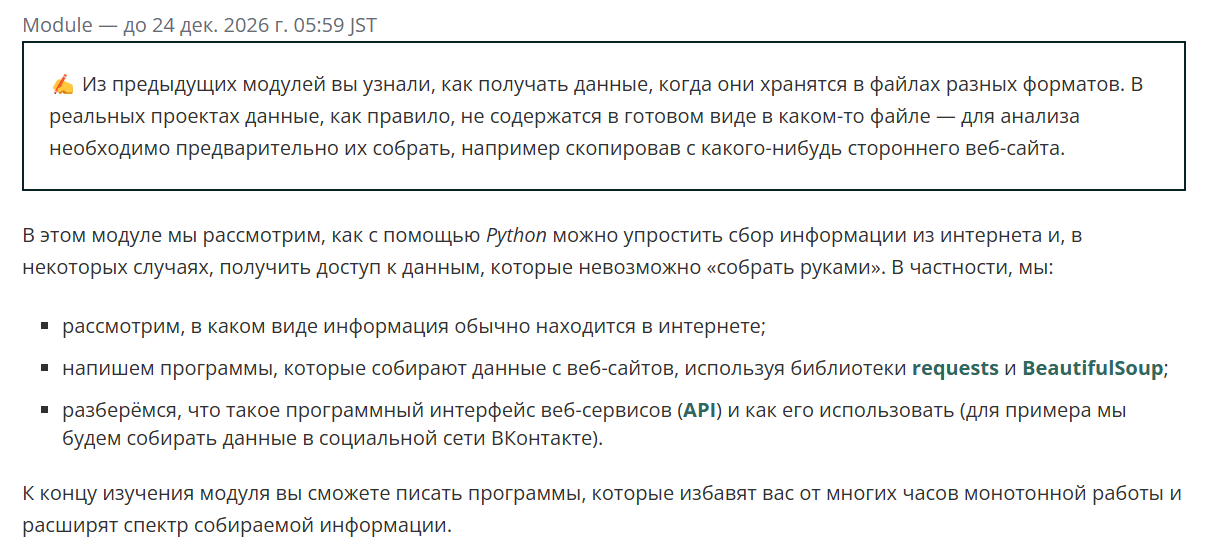


## 2. Веб-запросы ##

Процесс получения/извлечения информации с веб-ресурсов в интернете называется web-scraping (рус. веб-скрейпинг/веб-скрапинг). Веб-скрапинг может быть проделан вручную пользователем компьютера, однако этот термин обычно связывают с автоматизированными процессами, реализованными с помощью кода.

Какие данные можно извлечь в процессе веб-скрапинга?

- цены на товары конкурентов для оптимизации своей стратегии ценообразования;
- сообщения в социальных медиа, по которым можно отслеживать тренды в той или иной области;
- отзывы о товарах/услугах компании на различных площадках, которые можно впоследствии анализировать;
- контактные данные пользователей соцсетей или форумов для дальнейшего взаимодействия с этими пользователями;
- и т.д.

Для того чтобы веб-скрапинг был возможен, необходимо подключение компьютера, который будет задействован в этом процессе, к сети Интернет.

Интернет — это глобальная информационная сеть, которая позволяет компьютерам по всему миру обмениваться информацией. Один компьютер (называемый клиентом) отправляет запрос в определённом формате другому компьютеру (называемому сервером) и получает ответ (текст, изображение, видео и т. д.).

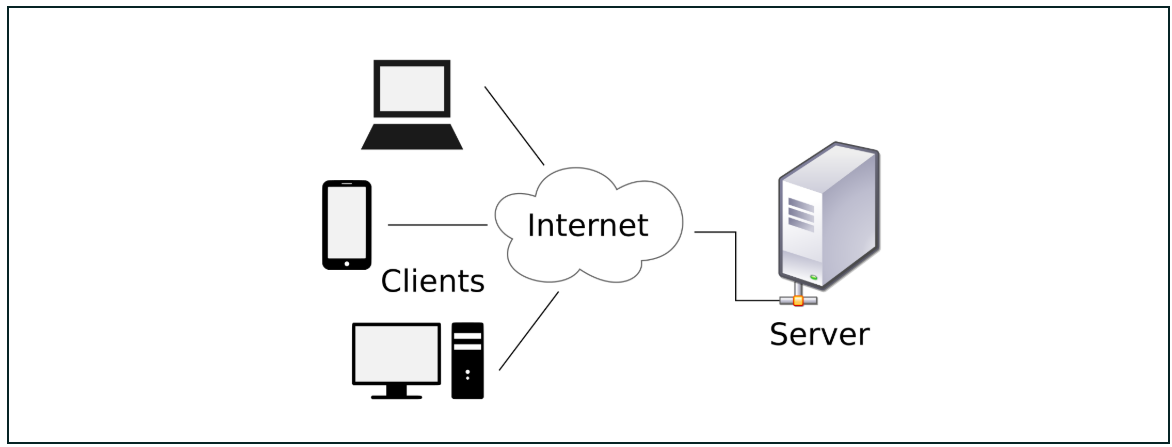

Клиент и сервер взаимодействуют между собой, обмениваясь одиночными сообщениями (не потоком данных) посредством сетевых протоколов, которые формализуют общение между ними. В настоящее время повсеместно используемый протокол в интернете, позволяющий клиенту получать различные ресурсы (например, HTML-документы), — это протокол HTTP.

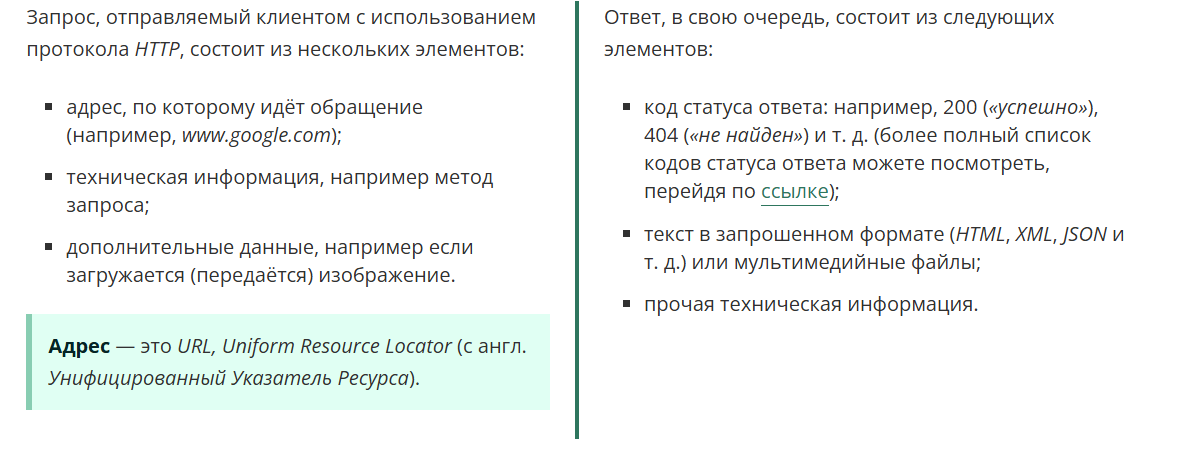

### Методы запросов в протоколе HTTP ###

Для того чтобы указать серверу на то, какое действие мы хотим произвести с ресурсом, в протоколе HTTP используются так называемые методы. В HTTP существует несколько методов, которые описывают действия с ресурсами. Чаще всего используются GET и POST.

#### GET — получение ресурса ####

Метод GET запрашивает информацию из указанного источника и не может влиять на его содержимое. Запрос доступен для кэширования данных (то есть для сохранения, восстановления и дальнейшего использования) и добавления в закладки. Длина запроса ограничена (максимальная длина — 2048 символов).

Пример GET-запроса, отправляемого через адресную строку браузера:

http://site.ru/page.php?name=dima&age=27

#### POST — создание ресурса ####

Метод POST используется для отправки данных, которые могут оказывать влияние на содержимое ресурса. В отличие от метода GET, запросы POST не могут быть кэшированы, они не остаются в истории браузера и их нельзя добавить в закладки. Длина запроса POST не ограничивается.

Пример POST-запроса, отправляемого через форму запроса:

POST / HTTP/1.0\r\n

Host: www.site.ru\r\n

Referer: http://www.site.ru/index.html\r\n

Cookie: income=1\r\n

Content-Type: application/x-www-form-urlencoded\r\n

Content-Length: 35\r\n

\r\n

login=Dima&password=12345

https://developer.mozilla.org/ru/docs/Web/HTTP/Reference/Methods

### 3. Библиотека requests ###

✍ В стандартной библиотеке Python для отправки веб-запросов существует функция urllib2, но большинство разработчиков используют стороннюю библиотеку requests (c англ. запросы), потому что её работа более стабильна, а созданный с её помощью код получается проще. Поэтому мы будем работать с библиотекой requests, а urllib2 рассматривать не будем.

Познакомимся с библиотекой requests, решив простую задачу — получить значения курсов валют. Курс валют — полезная и регулярно обновляемая информация, но каждый раз в ручном режиме получать информацию о курсе интересующей валюты трудоёмко.

Разработаем код, так называемый скрипт (англ. script, рус. сценарий), — небольшую программу, которая содержит последовательность действий для автоматического выполнения задачи.

С помощью скрипта мы будем в удобном виде выгружать информацию по курсам валют с заранее выбранного сайта.

Один из сайтов в интернете, на котором информация о курсах валют дублирует информацию с сайта Центрального Банка России, — ресурс Курсы валют ЦБ РФ в XML и JSON. На данном ресурсе информация о курсах валют представлена в разных форматах, в том числе и в структурированном JSON-формате, методы работы с которым мы изучили в одном из предыдущих модулей.

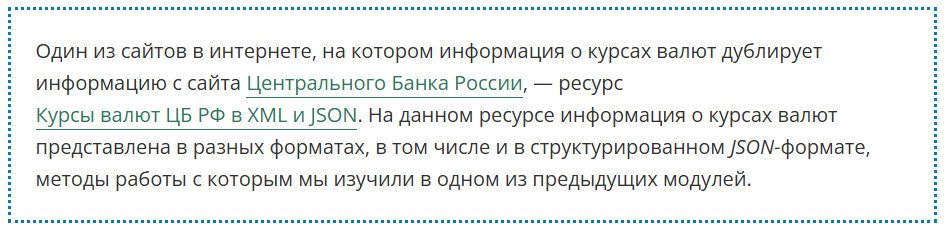

Перед началом работы библиотеку requests потребуется установить. Например, в Jupyter Notebook это делается с помощью такой команды:

In [3]:
# Устанавливаем библиотеку requests
!pip install requests 

Как только библиотека установлена, импортируем её и отправим наш первый запрос к ресурсу Курсы валют ЦБ РФ в XML и JSON. Используем метод get() из библиотеки requests, передав ему соответствующий URL —  https://www.cbr-xml-daily.ru/daily_json.js:

In [ ]:
import requests # Импортируем библиотеку requests
url = 'https://www.cbr-xml-daily.ru/daily_json.js' # Определяем значение URL страницы для запроса
response = requests.get(url) # Делаем GET-запрос к ресурсу и результат ответа сохраняем в переменной response

Проверим ответ сервера — содержимое переменной response:

In [6]:
print(response) # Выводим значение response на экран как объект

<Response [200]>


Мы получили объект ответа Response, который содержит всю нужную нам информацию. По умолчанию в квадратных скобках на экран выводится код статуса ответа. В данном случае он равен 200 — то есть запрос был корректным и сервер отдал нам нужную информацию. Значение кода статуса 404 означало бы, что страница по указанному адресу не найдена, а значение 403 — что синтаксис GET-запроса неверный.

Код ответа в виде числовой переменной можно получить с помощью метода status_code:

In [7]:
print(response.status_code) # Выводим числовое значение response на экран

200


In [8]:
url = 'https://www.cbr-xml-daily.ru/daily_json.js' # Определяем значение URL страницы для запроса
response = requests.get(url) # Делаем GET-запрос к ресурсу и результат ответа сохраняем в переменной response

## Работаем с ответом ##

Мы сделали запрос и получили корректный ответ (код статуса — 200). Дальнейшую работу производим с результатом запроса к ресурсу Курсы валют ЦБ РФ в XML и JSON.

Как получить доступ ко всей информации, которую содержит ответ?

Текст ответа хранится в атрибуте text. Выведем значение атрибута на экран и посмотрим на его содержимое:

In [9]:
print(response.text) # Выводим содержимое атрибута text переменной response на экран

{
    "Date": "2025-06-12T11:30:00+03:00",
    "PreviousDate": "2025-06-11T11:30:00+03:00",
    "PreviousURL": "\/\/www.cbr-xml-daily.ru\/archive\/2025\/06\/11\/daily_json.js",
    "Timestamp": "2025-06-15T11:00:00+03:00",
    "Valute": {
        "AUD": {
            "ID": "R01010",
            "NumCode": "036",
            "CharCode": "AUD",
            "Nominal": 1,
            "Name": "Австралийский доллар",
            "Value": 51.494,
            "Previous": 51.1295
        },
        "AZN": {
            "ID": "R01020A",
            "NumCode": "944",
            "CharCode": "AZN",
            "Nominal": 1,
            "Name": "Азербайджанский манат",
            "Value": 46.4722,
            "Previous": 46.2355
        },
        "GBP": {
            "ID": "R01035",
            "NumCode": "826",
            "CharCode": "GBP",
            "Nominal": 1,
            "Name": "Фунт стерлингов",
            "Value": 106.7723,
            "Previous": 106.4641
        },
        "AMD": {

Как правило, при работе над реальным проектом на этапе получения данных мы уже понимаем, с какими форматами данных нам придётся работать. На предлагаемом для работы ресурсе информация есть как в JSON-формате, так и в XML. По нашему запросу ресурс возвращает информацию в JSON-формате, однако в настоящий момент результат хранится как единая строка. Проверить тип данных полученного ответа можно, воспользовавшись функцией type().

Для того чтобы удобно было работать с полученной информацией, нам необходимо преобразовать строку в словарь. В объект ответа Response  из библиотеки requests уже встроен метод json() .

Импортируем функцию pprint(), применим к полученному ответу метод json() и выведем полученный результат на экран:

In [10]:
from pprint import pprint # Импортируем функцию pprint()
import json # Импортируем модуль json
currencies = response.json() # Применяем метод json()
pprint(currencies) # Выводим результат на экран

{'Date': '2025-06-12T11:30:00+03:00',
 'PreviousDate': '2025-06-11T11:30:00+03:00',
 'PreviousURL': '//www.cbr-xml-daily.ru/archive/2025/06/11/daily_json.js',
 'Timestamp': '2025-06-15T11:00:00+03:00',
 'Valute': {'AED': {'CharCode': 'AED',
                    'ID': 'R01230',
                    'Name': 'Дирхам ОАЭ',
                    'Nominal': 1,
                    'NumCode': '784',
                    'Previous': 21.4024,
                    'Value': 21.512},
            'AMD': {'CharCode': 'AMD',
                    'ID': 'R01060',
                    'Name': 'Армянских драмов',
                    'Nominal': 100,
                    'NumCode': '051',
                    'Previous': 20.4934,
                    'Value': 20.6139},
            'AUD': {'CharCode': 'AUD',
                    'ID': 'R01010',
                    'Name': 'Австралийский доллар',
                    'Nominal': 1,
                    'NumCode': '036',
                    'Previous': 51.1295,
             

Теперь данные находятся в словаре и можно легко получать необходимые значения.

Например, по ключу Valute мы можем обратиться к вложенному словарю, который содержит информацию о мировых валютах. Выведем на экран, например, информацию о евро (EUR):

In [11]:
pprint(currencies['Valute']['EUR']) # Выводим на экран информацию о валюте евро

{'CharCode': 'EUR',
 'ID': 'R01239',
 'Name': 'Евро',
 'Nominal': 1,
 'NumCode': '978',
 'Previous': 89.7918,
 'Value': 90.0068}


Повторите запросы, описанные в этом юните, на своём компьютере. Что будет выведено на экран в результате выполнения следующего кода?

In [12]:
print(currencies['Valute']['CZK']['Name'])

Чешских крон


###  4. Парсинг сайтов ###

✍ Ресурс, с которым мы работали в предыдущем юните, возвращал ответ о текущем курсе валют в удобном, структурированном формате, из которого было легко извлечь необходимую информацию. Довольно часто для получения информации приходится обращаться напрямую к HTML-страницам.

Для примера рассмотрим страницу, содержащую статью с информацией о присуждении Нобелевской премии по экономике в 2021 году, и попробуем извлечь из неё заголовок статьи, опубликованной на странице, дату публикации, а также текст статьи.

Получить содержимое страницы в большинстве случаев несложно, гораздо труднее извлечь из HTML-кода нужную информацию.

#### Основы HTML ####

HTML (англ. HyperText Markup Language, рус. язык гипертекстовой разметки) — стандартизированный язык разметки документов в интернете. Большинство веб-страниц содержат описание разметки на языке HTML. Язык HTML интерпретируется браузерами. Полученный в результате интерпретации текст отображается на экране монитора компьютера или мобильного устройства.

HTML позволяет создавать макет страницы, разбивая её на блоки: мы можем поместить содержимое посередине страницы, сбоку и т. п.

Кроме того, HTML используется для описания форматирования. Например, с его помощью мы можем указать, какая часть текста должна отображаться крупным шрифтом как заголовок, какая — курсивом, а какая — как обычный текст.

HTML является близким родственником уже знакомого вам формата XML. Разметка на языке HTML делается с помощью так называемых тегов, которые помещаются в угловые скобки, и применяется к элементам, заключённым внутри них. Посмотрите на примеры:

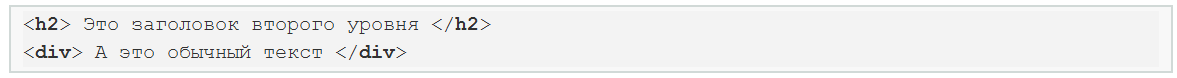

У корректной HTML-страницы есть заголовок и тело страницы. В заголовке (в тегах <head> … </head>)  размещается техническая информация, подключаются скрипты и стили. В теле <body> … </body> находятся текст и данные, которые непосредственно отображаются на странице в браузере.

Разметка небольшой страницы выглядит примерно так:



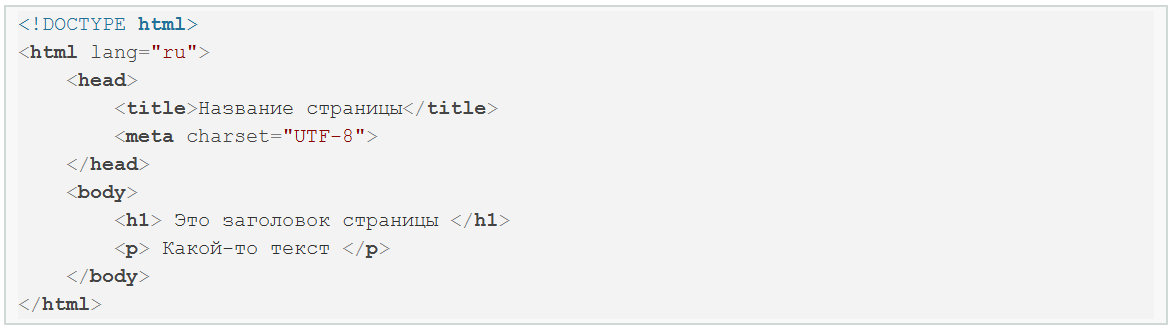

Вы можете сохранить этот код в текстовом файле с расширением .html и открыть этот файл в браузере.

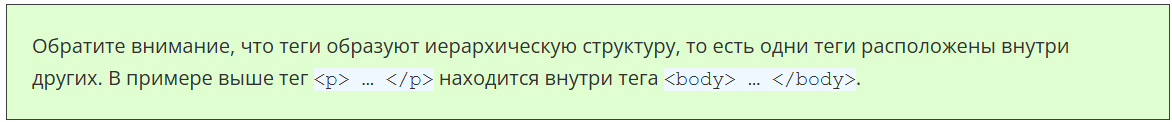

Кроме того, у тегов могут быть атрибуты, которые пишутся внутри открывающегося тега. Самые популярные атрибуты — это class и id:

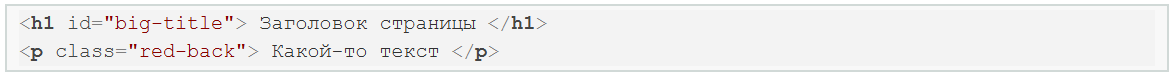

Изучение языка HTML находится вне рамок этого курса, но для того, чтобы собирать информацию с веб-страниц, нет необходимости хорошо знать HTML. Достаточно понимать, что:

- существуют теги с разными именами;
- у тегов бывают атрибуты, такие как class и id;
- теги образуют иерархическую структуру, то есть одни теги вложены в другие.

### Получаем содержимое веб-страницы ###

Получим HTML-код интересующей нас страницы.

Для этого отправим GET-запрос с помощью библиотеки requests и метода get() и посмотрим на текст ответа на наш запрос (как мы помним, он содержится в атрибуте text):

In [13]:
import requests # Импортируем библиотеку requests
url = 'https://nplus1.ru/news/2021/10/11/econobel2021' # Определяем адрес страницы
response = requests.get(url)  # Выполняем GET-запрос
print(response.text)  # Выводим содержимое атрибута text

<!DOCTYPE html>
<html prefix="og: http://ogp.me/ns#" lang="ru">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>Премию Нобеля по экономике присудили за исследования экономики труда и причинно-следственных связей</title>
    <link rel="preload" href="https://staticn1.nplus1.ru/fonts/AeonikPro/AeonikPro-Regular.woff2" as="font" type="font/woff2" crossorigin />
    <link rel="preload" href="https://staticn1.nplus1.ru/fonts/Spectral/Spectral-Regular.woff" as="font" type="font/woff2" crossorigin />
  <link href="/front-build/css/main.css?id=842e64708435127ee441c2e86afffea2" rel="stylesheet">
  <link href="/front-build/css/app.css?id=92673ebe7185ebc42e29fc7294a4c65f" rel="stylesheet">
  

  <link rel="apple-touch-icon" sizes="180x180" href="/apple-touch-icon.png">
  <link rel="icon" type="image/png" sizes="32x32" href="/favicon-32x32.png">
  <link rel="icon" type="image/png" sizes="16x16" href="/favicon-16x16.png">
  <link rel="

Ответ содержит HTML-код страницы, к которой мы обратились.

В отличие от предыдущего примера, где ответ возвращался в JSON-формате, мы не можем так просто преобразовать HTML-код в словарь и извлечь необходимую нам информацию.

Для решения таких задач в Python существует специальная библиотека BeautifulSoup, о работе с которой мы поговорим в следующем юните.